In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.fftpack as fft
%matplotlib inline

In [2]:
def sine(frequency, sample_rate, num_samples):
    x = np.arange(num_samples)
    return np.cos(2 * np.pi * frequency * x / sample_rate)

In [3]:
SAMPLE_RATE = 44100
SINE_A4 = sine(441, SAMPLE_RATE, 4096)

<AxesSubplot: >

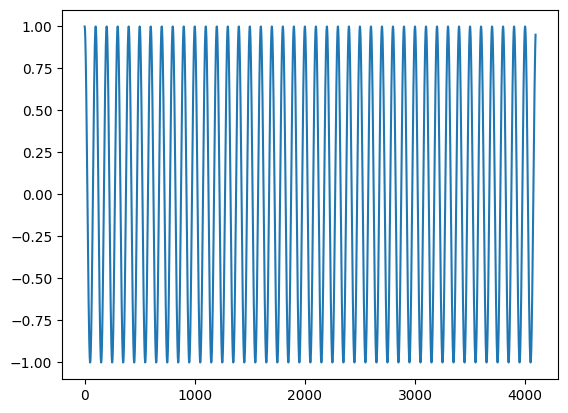

In [4]:
pd.Series(SINE_A4).plot()

## DFT

In [5]:
# fft.fft([])

In [6]:
fft.fft([0])

array([0.-0.j])

In [7]:
fft.fft([0, 0])

array([0.-0.j, 0.-0.j])

In [8]:
fft.fft([1])

array([1.-0.j])

In [9]:
fft.fft([1, 0])

array([1.-0.j, 1.-0.j])

In [10]:
fft.fft([1, 0, 0])

array([1.-0.j, 1.+0.j, 1.-0.j])

In [11]:
fft.fft([0, 1, 0])

array([ 1. -0.j       , -0.5-0.8660254j, -0.5+0.8660254j])

/Users/christiankauten/Documents/Projects/Rack/plugins/KautenjaDSP/notebooks/.env/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<AxesSubplot: >

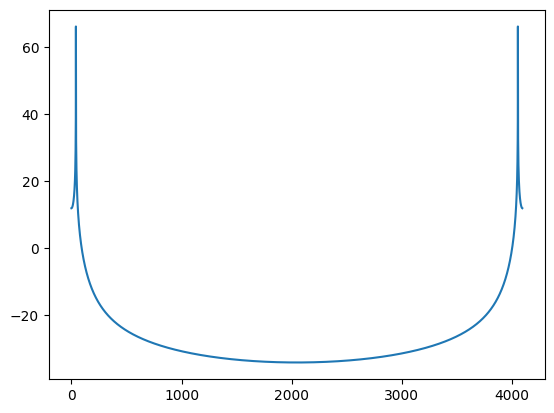

In [12]:
# Calculate the DFT coefficients using the FFT
DFT_A4 = fft.fft(SINE_A4)
# Convert the coefficients to decibels for gain analysis
DFT_dB_A4 = 20 * np.log10(DFT_A4)
# Plot the full DFT (including symmetric copy)
pd.Series(DFT_dB_A4).plot()

<AxesSubplot: >

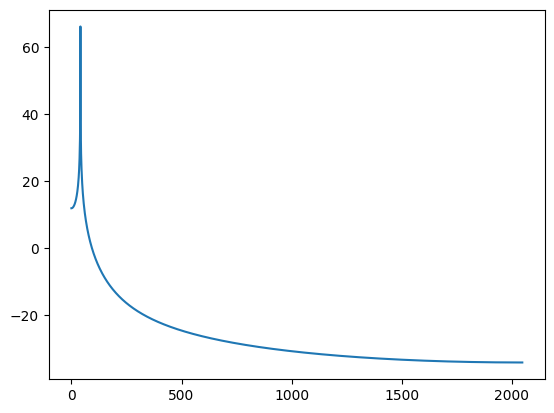

In [13]:
# Truncate the DFT up to the Nyquist rate (i.e. sample rate / 2)
DFT_dB_NR_A4 = DFT_dB_A4[:len(DFT_dB_A4)//2]
# Plot the DFT of the valid digital frequency spectrum.
pd.Series(DFT_dB_NR_A4).plot()

In [14]:
# Find the largest coefficient and convert its frequency bin to Hz
DFT_dB_NR_A4.argmax() * SAMPLE_RATE / len(DFT_A4)

441.4306640625

## IDFT

In [15]:
# fft.ifft([])

In [16]:
fft.ifft([0])

array([0.-0.j])

In [17]:
fft.ifft([0, 0])

array([0.-0.j, 0.-0.j])

In [18]:
fft.ifft([1])

array([1.-0.j])

In [19]:
fft.ifft([1, 0])

array([0.5-0.j, 0.5-0.j])

In [20]:
fft.ifft([1, 0, 0])

array([0.33333333-0.j, 0.33333333-0.j, 0.33333333+0.j])

In [21]:
fft.ifft([0, 1, 0])

array([ 0.33333333-0.j        , -0.16666667+0.28867513j,
       -0.16666667-0.28867513j])

<AxesSubplot: >

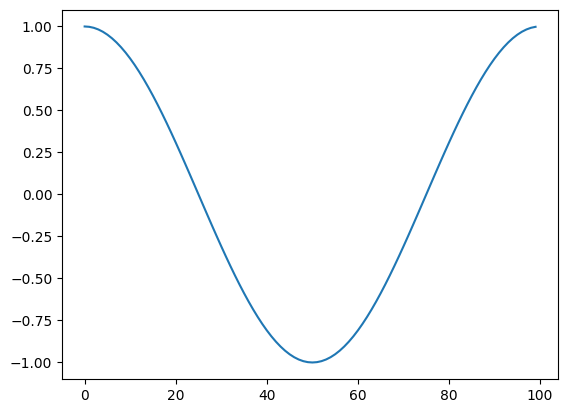

In [22]:
pd.Series(100 * fft.ifft([0, 1] + 98 * [0])).plot()